In [2]:
from google.colab import files
files.upload()

ModuleNotFoundError: No module named 'google'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('insurance.csv')

# **Explatory Data Analyse**

In [5]:
df.shape

(1338, 7)

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


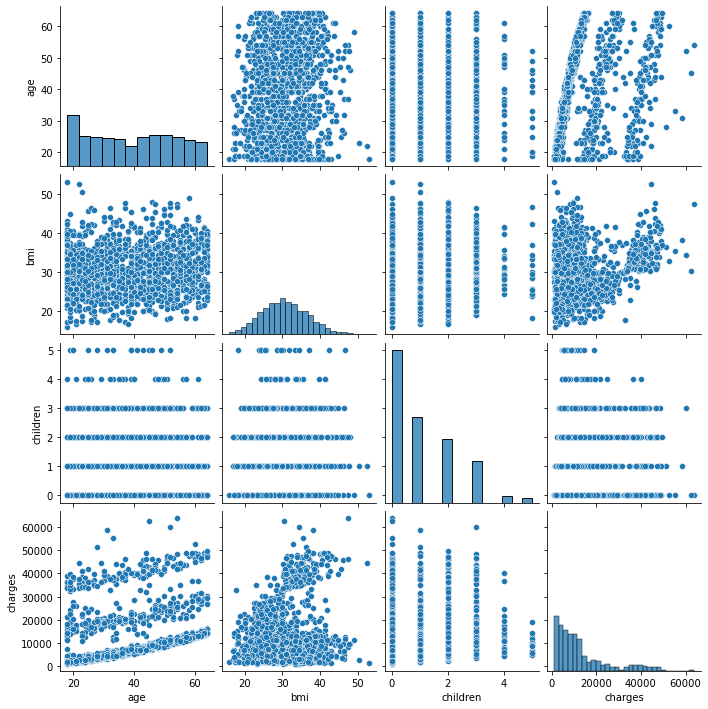

In [9]:
sns.pairplot(df)

In [10]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# **One Hot Encoding**

In [11]:
region_dum = pd.get_dummies(df['region'], drop_first= True)

In [12]:
region_dum

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1333,1,0,0
1334,0,0,0
1335,0,1,0
1336,0,0,1


In [13]:
sex_dum = pd.get_dummies(df['sex'])

In [14]:
smoker_dum = pd.get_dummies(df['smoker'])

In [15]:
df1 = df[['age', 'bmi', 'children', 'charges']]

In [16]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [18]:
df_update = pd.concat([df, region_dum, sex_dum, smoker_dum], axis = 1)
df_update

,age,sex,bmi,children,smoker,region,charges,northwest,southeast,southwest,female,male,no,yes
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,1,1,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0,0,1,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0,0,1,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,0,0,1,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0,0,0,1,1,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,0,1,0,1,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,1,0,1,0,1,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,1,1,0,1,0


In [19]:
df_up = df_update.drop(['sex', 'smoker', 'region'], axis = 1)
df_up

,age,bmi,children,charges,northwest,southeast,southwest,female,male,no,yes
0,19,27.900,0,16884.92400,0,0,1,1,0,0,1
1,18,33.770,1,1725.55230,0,1,0,0,1,1,0
2,28,33.000,3,4449.46200,0,1,0,0,1,1,0
3,33,22.705,0,21984.47061,1,0,0,0,1,1,0
4,32,28.880,0,3866.85520,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,0,0,1,1,0
1334,18,31.920,0,2205.98080,0,0,0,1,0,1,0
1335,18,36.850,0,1629.83350,0,1,0,1,0,1,0
1336,21,25.800,0,2007.94500,0,0,1,1,0,1,0


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'charges'}>]], dtype=object)

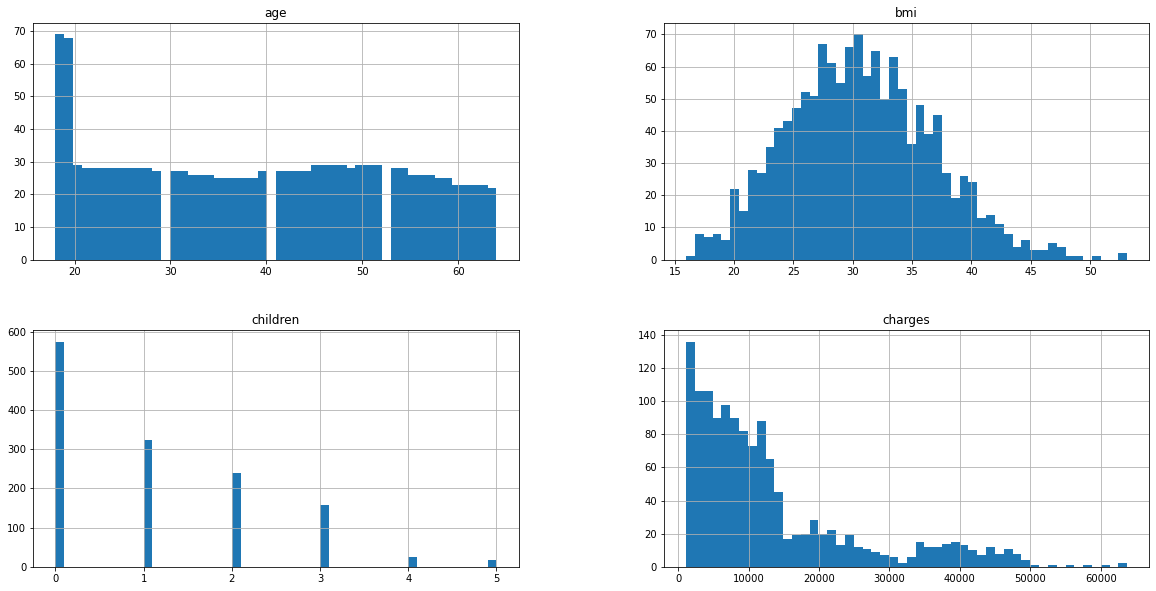

In [20]:
df1.hist(bins= 50, figsize= (20, 10))

In [21]:
young = df1[df1['age'] <= 30]
mid = df1[(df1['age']>30) & (df1['age']<50)]
old = df1[df1['age'] >= 50]

<AxesSubplot:ylabel='Density'>

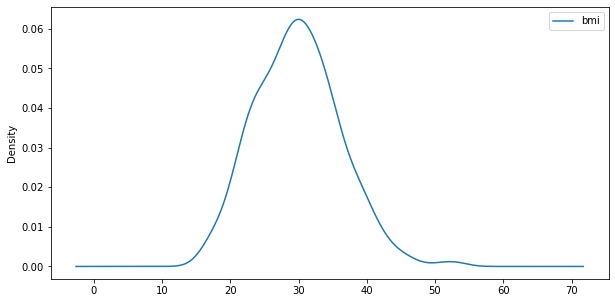

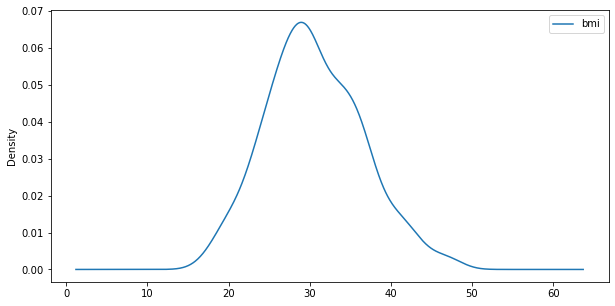

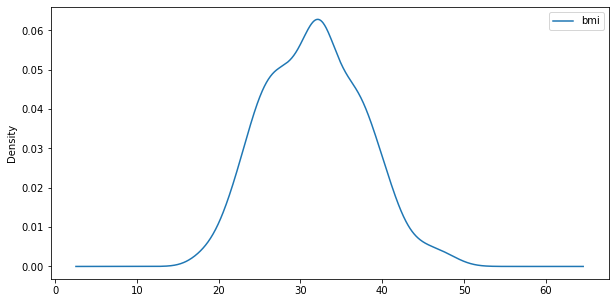

In [22]:
young[['age', 'bmi']].plot(kind='density', x='age', y='bmi', figsize=(10,5))
mid[['age', 'bmi']].plot(kind='density', x='age', y='bmi', figsize=(10,5))
old[['age', 'bmi']].plot(kind='density', x='age', y='bmi', figsize=(10,5))

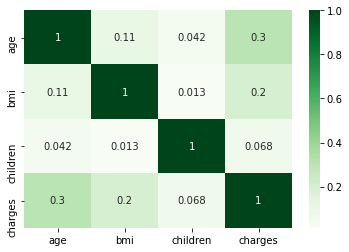

In [23]:
ax = sns.heatmap(data = df1.corr(), cmap ='Greens', annot = True)

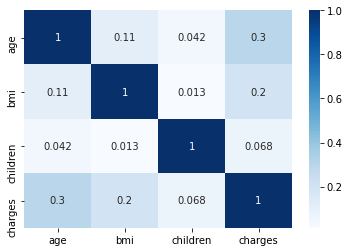

In [24]:
ax = sns.heatmap(data = df.corr(), cmap ='Blues', annot = True)

Text(0, 0.5, 'Ages')

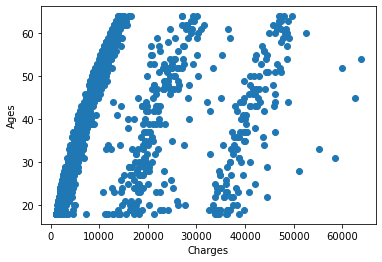

In [25]:
plt.scatter(df1['charges'], df1['age'])
plt.xlabel('Charges')
plt.ylabel('Ages')

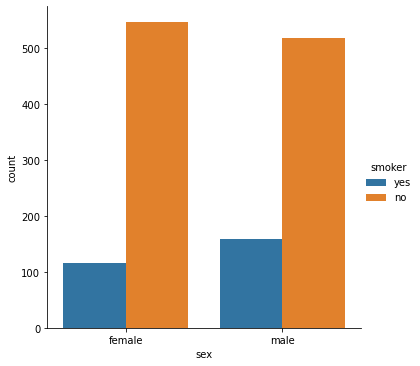

In [26]:
sns.catplot(x = 'sex', kind = 'count', hue = 'smoker',  data = df[['sex', 'smoker']], order = ['female', 'male'])

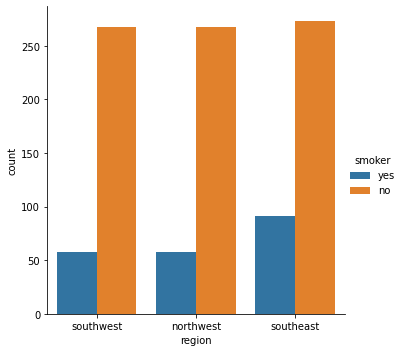

In [45]:
sns.catplot(x = 'region', kind = 'count', hue = 'smoker', data = df[['region', 'smoker']], order = ['southwest', 'northwest', 'southeast'])

# **Linear Model**

In [27]:
from sklearn.model_selection import train_test_split
x = df_up.drop(['charges'], axis = 1)
y = df_up['charges']

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state= 1)

In [29]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

In [30]:
lreg.fit(x_train, y_train)

LinearRegression()

In [31]:
lreg.score(x, y)

0.750503963522578

In [32]:
accuracy = lreg.score(x_test, y_test)
print("Accuracy: ", accuracy*100, '%')

Accuracy:  73.39256331232804 %


# Model Perfection **Calculation**

In [33]:
from sklearn.metrics import r2_score
predictions = lreg.predict(x_test)
print("R-square Value: ", r2_score(y_test, predictions))

R-square Value:  0.7339256331232803


In [34]:
from sklearn import metrics
MAE = metrics.mean_absolute_error(y_test, predictions)
MAE

4018.4686552221915

In [35]:
MSE = metrics.mean_squared_error(y_test, predictions)
MSE

35791108.68765433

In [36]:
RMSE = np.sqrt(MSE)
RMSE

5982.567065036073

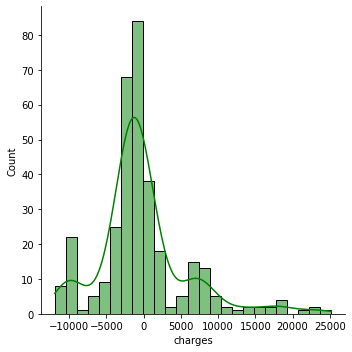

In [37]:
test_residulas = y_test - predictions
sns.displot(test_residulas, bins = 25, kde = True, color = 'Green')

In [38]:
lreg.predict([[21, 24.59, 0, 0, 1, 0, 0, 1, 1, 0]])

array([895.13692352])